<a href="https://colab.research.google.com/github/schizohub/PyTorch_lessons/blob/main/pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Data (preparing and loading)

In [177]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.002

X = torch.arange(start,end,step).unsqueeze(dim=1)

y = bias + X*weight

X[:10], y[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]), tensor([[0.3000],
         [0.3014],
         [0.3028],
         [0.3042],
         [0.3056],
         [0.3070],
         [0.3084],
         [0.3098],
         [0.3112],
         [0.3126]]))

In [178]:
len(X)
0.8*len(X)

400.0

In [179]:
x_train = X[:400]
x_test = X[400:]
y_train = y[:400]
y_test = y[400:]

# Visualizing data to see how correlate things to each other 

In [180]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(14,8))

    plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')

    plt.scatter(test_data, test_labels, c='g',s=4,label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14});



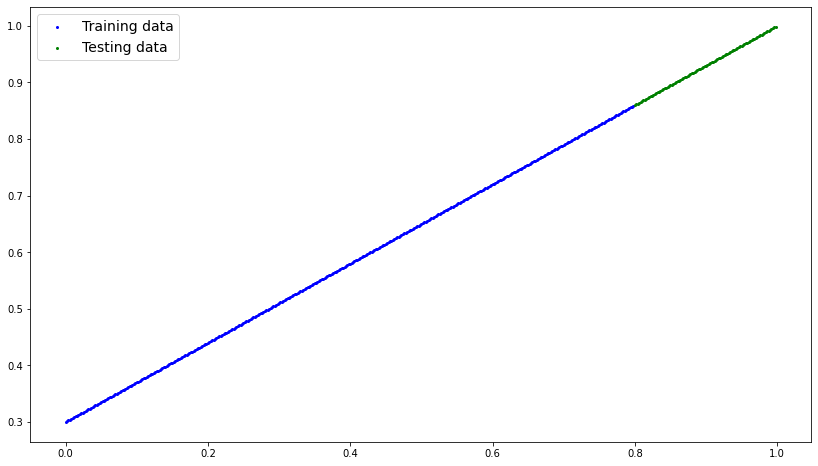

In [181]:
plot_predictions();

# Build a model

In [277]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self,x):
        return self.weights*x+self.bias
            




In [290]:
# torch.manual_seed(42)
model_0 = LinearRegression()
# model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.2815], requires_grad=True), Parameter containing:
 tensor([0.0562], requires_grad=True)]

In [214]:
model_0(x_test)[:10]

tensor([[0.4179],
        [0.4184],
        [0.4188],
        [0.4193],
        [0.4198],
        [0.4202],
        [0.4207],
        [0.4212],
        [0.4217],
        [0.4221]], grad_fn=<SliceBackward0>)

In [291]:
with torch.inference_mode():
    y_preds = model_0(x_test) 

y_preds[:10]

tensor([[0.2814],
        [0.2819],
        [0.2825],
        [0.2831],
        [0.2836],
        [0.2842],
        [0.2848],
        [0.2853],
        [0.2859],
        [0.2864]])

In [216]:
y_test[:10]

tensor([[0.8600],
        [0.8614],
        [0.8628],
        [0.8642],
        [0.8656],
        [0.8670],
        [0.8684],
        [0.8698],
        [0.8712],
        [0.8726]])

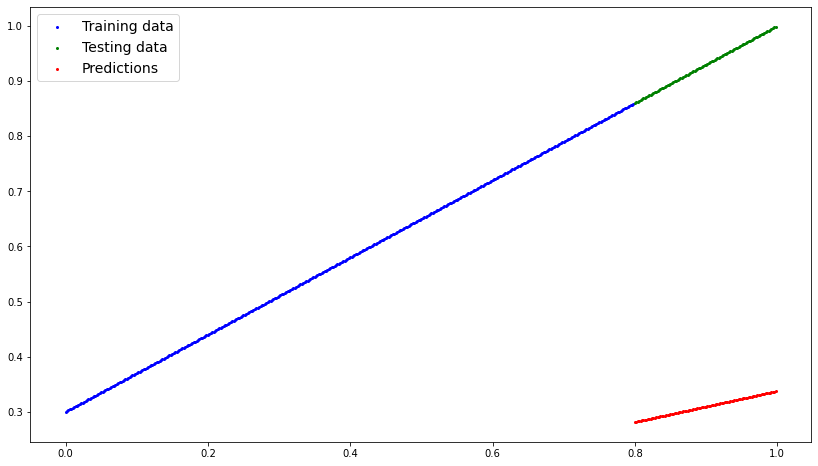

In [292]:
plot_predictions(predictions=y_preds)

# Train model (optimizing and improving the model parameters (e.g weights and bias))

In [293]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [294]:
torch.manual_seed(42)


epochs = 200
#Track different values 
epoch_count = []
loss_values = []
test_loss_values = []
### Training

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training data
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass (forward propagation)
    y_pred = model_0(x_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()  

    ### Testing
    model_0.eval() 
    with torch.inference_mode(): # turns off gradient tracking
        # 1.Do the forward pass
        test_pred = model_0(x_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)

        # 3. 
    if epoch % 10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.4108101725578308 | Test_loss: 0.6064633727073669
OrderedDict([('weights', tensor([0.2855])), ('bias', tensor([0.0662]))])
Epoch: 10 | Loss: 0.29489007592201233 | Test_loss: 0.47059333324432373
OrderedDict([('weights', tensor([0.3254])), ('bias', tensor([0.1662]))])
Epoch: 20 | Loss: 0.17896994948387146 | Test_loss: 0.33472320437431335
OrderedDict([('weights', tensor([0.3653])), ('bias', tensor([0.2662]))])
Epoch: 30 | Loss: 0.08206981420516968 | Test_loss: 0.21314102411270142
OrderedDict([('weights', tensor([0.4044])), ('bias', tensor([0.3526]))])
Epoch: 40 | Loss: 0.05534584820270538 | Test_loss: 0.14962081611156464
OrderedDict([('weights', tensor([0.4358])), ('bias', tensor([0.3879]))])
Epoch: 50 | Loss: 0.04866554215550423 | Test_loss: 0.12099456042051315
OrderedDict([('weights', tensor([0.4588])), ('bias', tensor([0.3959]))])
Epoch: 60 | Loss: 0.04492054507136345 | Test_loss: 0.10656431317329407
OrderedDict([('weights', tensor([0.4777])), ('bias', tensor([0.3933]

In [195]:
weight, bias

(0.7, 0.3)

In [295]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6987])), ('bias', tensor([0.3042]))])

In [269]:
y_test[:10]

tensor([[0.8600],
        [0.8614],
        [0.8628],
        [0.8642],
        [0.8656],
        [0.8670],
        [0.8684],
        [0.8698],
        [0.8712],
        [0.8726]])

In [296]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)
y_preds_new[:10]

tensor([[0.8632],
        [0.8645],
        [0.8659],
        [0.8673],
        [0.8687],
        [0.8701],
        [0.8715],
        [0.8729],
        [0.8743],
        [0.8757]])

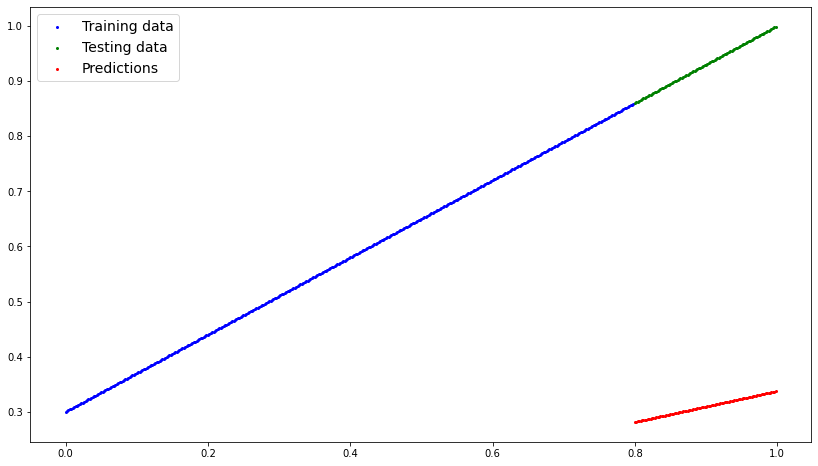

In [297]:
plot_predictions(predictions=y_preds);

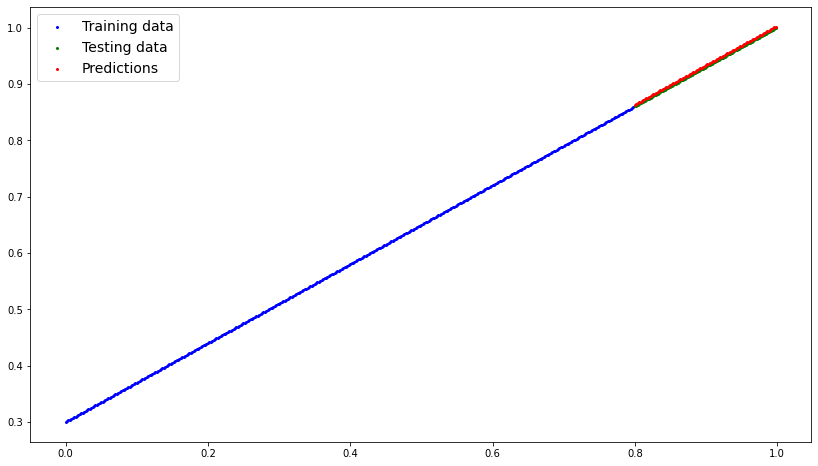

In [298]:
plot_predictions(predictions=y_preds_new);

In [299]:
import numpy as np
loss_values = np.array(torch.tensor(loss_values).cpu().numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).cpu().numpy())

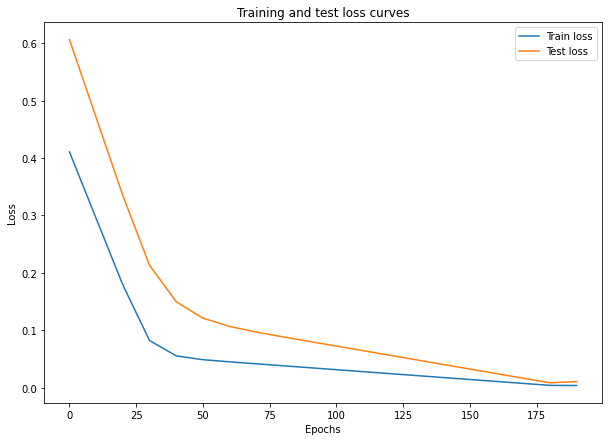

In [300]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel("Epochs")
plt.legend();
plt.show()

In [310]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6987])), ('bias', tensor([0.3042]))])

# Saving, loading and reusing the model 

In [302]:
#Saving a PyTorch model
from pathlib import Path 
# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_first_neural_network_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model in the state_dict()

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_first_neural_network_model.pth


In [305]:
!ls  models

01_pytorch_first_neural_network_model.pth


In [309]:
#Loading a PyTorch model
# 1. To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [311]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6987])), ('bias', tensor([0.3042]))])

In [313]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds[:10]

tensor([[0.8632],
        [0.8645],
        [0.8659],
        [0.8673],
        [0.8687],
        [0.8701],
        [0.8715],
        [0.8729],
        [0.8743],
        [0.8757]])

In [316]:
y_preds_new[:10]==loaded_model_preds[:10]

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])